In [1]:
from dgeb.tasks import EcoliOperon, PairClassificationEvaluator
from datasets import load_dataset

import pandas as pd
import numpy as np
import re
from Bio import SeqIO

In [2]:
task = EcoliOperon()
hf_ds = load_dataset(task.metadata.datasets[0].path)
df = pd.DataFrame(hf_ds["train"])
display(df.head())
display(df.tail())

,Entry,Sequence,Label
0,U00096.3_prot_AAC73112.1_1,MKRISTTITTTITITTGNGAG,1
1,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,1
2,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,1
3,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,0
4,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,0


,Entry,Sequence,Label
4310,U00096.3_prot_AAC77353.1_4311,MLKSPLFWKMTSLFGAVLLLLIPIMLIRQVIVERADYRSDVEDAIR...,0
4311,U00096.3_prot_AAC77354.1_4312,MQTPHILIVEDELVTRNTLKSIFEAEGYDVFEATDGAEMHQILSEY...,0
4312,U00096.3_prot_AAC77355.1_4313,MTKVRNCVLDALSINVNNIISLVVGTFPQDPTVSKTAVILTILTAT,0
4313,U00096.3_prot_UMR55121.1_4314,MSRFIFYKIILSKQKDM,0
4314,U00096.3_prot_AAC77356.1_4315,MRITIILVAPARAENIGAAARAMKTMGFSDLRIVDSQAHLEPATRW...,0


In [3]:
def extract_protein_id(entry):
    """Extracts the protein identifier from the Entry string."""
    match = re.search(r"U00096\.3_prot_([A-Z0-9]+\.\d+)", entry)
    if match:
        return match.group(1)
    else:
        return None

def create_pairs(df):
    """Creates pairs of consecutive proteins from the DataFrame."""
    pairs = []
    for i in range(len(df) - 1):
        protein_A = df.iloc[i]
        protein_B = df.iloc[i + 1]
        pairs.append({
            "Entry_A": protein_A["Entry"],
            "Sequence_A": protein_A["Sequence"],
            "refseq_A": extract_protein_id(protein_A["Entry"]),
            "Entry_B": protein_B["Entry"],
            "Sequence_B": protein_B["Sequence"],
            "refseq_B": extract_protein_id(protein_B["Entry"]),
            "Label": protein_A["Label"]
        })
    return pd.DataFrame(pairs)

pairs_df = create_pairs(df) 

In [4]:
pairs_df

,Entry_A,Sequence_A,refseq_A,Entry_B,Sequence_B,refseq_B,Label
0,U00096.3_prot_AAC73112.1_1,MKRISTTITTTITITTGNGAG,AAC73112.1,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,AAC73113.1,1
1,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,AAC73113.1,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,AAC73114.1,1
2,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,AAC73114.1,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,AAC73115.1,1
3,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,AAC73115.1,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,AAC73116.1,0
4,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,AAC73116.1,U00096.3_prot_AAC73117.1_6,MLILISPAKTLDYQSPLTTTRYTLPELLDNSQQLIHEARKLTPPQI...,AAC73117.1,0
...,...,...,...,...,...,...,...
4309,U00096.3_prot_AAC77352.1_4310,MRIGMRLLLGYFLLVAVAAWFVLAIFVKEVKPGVRRATEGTLIDTA...,AAC77352.1,U00096.3_prot_AAC77353.1_4311,MLKSPLFWKMTSLFGAVLLLLIPIMLIRQVIVERADYRSDVEDAIR...,AAC77353.1,1
4310,U00096.3_prot_AAC77353.1_4311,MLKSPLFWKMTSLFGAVLLLLIPIMLIRQVIVERADYRSDVEDAIR...,AAC77353.1,U00096.3_prot_AAC77354.1_4312,MQTPHILIVEDELVTRNTLKSIFEAEGYDVFEATDGAEMHQILSEY...,AAC77354.1,0
4311,U00096.3_prot_AAC77354.1_4312,MQTPHILIVEDELVTRNTLKSIFEAEGYDVFEATDGAEMHQILSEY...,AAC77354.1,U00096.3_prot_AAC77355.1_4313,MTKVRNCVLDALSINVNNIISLVVGTFPQDPTVSKTAVILTILTAT,AAC77355.1,0
4312,U00096.3_prot_AAC77355.1_4313,MTKVRNCVLDALSINVNNIISLVVGTFPQDPTVSKTAVILTILTAT,AAC77355.1,U00096.3_prot_UMR55121.1_4314,MSRFIFYKIILSKQKDM,UMR55121.1,0


In [5]:
filename = "data/sequence.gb"
gene_annotations = {}
for record in SeqIO.parse(filename, "genbank"):
  for feature in record.features:
        if "protein_id" in feature.qualifiers:
                pid = feature.qualifiers["protein_id"][0]
                loc = feature.location
                start = int(loc.start)
                end = int(loc.end)
                gene_seq = str(record.seq[start:end])
                gene_annotations[pid] = {
                    "start": start,
                    "end": end,
                    "strand": int(loc.strand),
                    "sequence": gene_seq,
                    "gc_content": (gene_seq.count('G') + gene_seq.count('C')) / len(gene_seq),
                    "locus_tag": feature.qualifiers.get("locus_tag", ["unknown"])[0]
                }

In [6]:
print("Sample Gene Annotations:", list(gene_annotations.items())[:5])

Sample Gene Annotations: [('AAC73112.1', {'start': 189, 'end': 255, 'strand': 1, 'sequence': 'ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA', 'gc_content': 0.5151515151515151, 'locus_tag': 'b0001'}), ('AAC73113.1', {'start': 336, 'end': 2799, 'strand': 1, 'sequence': 'ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCC

In [7]:
def get_gene_features(refseq, gene_annotations):
    """Extract gene features from annotations dictionary."""
    # Try exact match first
    annot = gene_annotations.get(refseq, {})
    
    # If exact match not found, try matching base accession (ignore version)
    if not annot and '.' in refseq:
        base_accession = refseq.split('.')[0]  # e.g., "AAC75042"
        # Find any version of this accession
        for key in gene_annotations.keys():
            if key.startswith(base_accession + '.'):
                annot = gene_annotations[key]
                break
    
    return {
        "start": annot.get("start"),
        "end": annot.get("end"),
        "strand": annot.get("strand"),
        "gene_seq": annot.get("sequence"),
        "gc_content": annot.get("gc_content"),
        "locus_tag": annot.get("locus_tag")
    }


def create_pairs(df, gene_annotations):
    """Creates pairs of consecutive proteins from the DataFrame."""
    pairs = []
    for i in range(len(df) - 1):
        protein_A = df.iloc[i]
        protein_B = df.iloc[i + 1]
        
        refseq_A = extract_protein_id(protein_A["Entry"])
        refseq_B = extract_protein_id(protein_B["Entry"])
        
        # Get GenBank features
        features_A = get_gene_features(refseq_A, gene_annotations)
        features_B = get_gene_features(refseq_B, gene_annotations)
        
        pairs.append({
            "Entry_A": protein_A["Entry"],
            "Sequence_A": protein_A["Sequence"],
            "refseq_A": refseq_A,
            "locus_tag_A": features_A["locus_tag"],
            **{f"{k}_A": v for k, v in features_A.items()},
            "Entry_B": protein_B["Entry"],
            "Sequence_B": protein_B["Sequence"],
            "refseq_B": refseq_B,
            "locus_tag_B": features_B["locus_tag"],
            **{f"{k}_B": v for k, v in features_B.items()},
            "gc_content_diff": abs(features_A["gc_content"] - features_B["gc_content"]),
            
            "Label": protein_A["Label"]
        })
    return pd.DataFrame(pairs).astype({
        'start_A': 'Int64', 'end_A': 'Int64', 'strand_A': 'Int64',
        'start_B': 'Int64', 'end_B': 'Int64', 'strand_B': 'Int64'
    })

In [8]:
#b_number_count = df['Entry'].str.contains(r'_prot_b\d+_').sum()
#print(f"Entries with b-numbers: {b_number_count} / {len(df)}")

# Filter out b-number entries before creating pairs
df_clean = df[~df['Entry'].str.contains(r'_prot_b\d+_', regex=True)]
print(f"Filtered out {len(df) - len(df_clean)} entries with b-numbers")

# Now create pairs with the cleaned data
pairs_df = create_pairs(df_clean, gene_annotations)
display(pairs_df.head())

Filtered out 17 entries with b-numbers


,Entry_A,Sequence_A,refseq_A,locus_tag_A,start_A,end_A,strand_A,gene_seq_A,gc_content_A,Entry_B,Sequence_B,refseq_B,locus_tag_B,start_B,end_B,strand_B,gene_seq_B,gc_content_B,gc_content_diff,Label
0,U00096.3_prot_AAC73112.1_1,MKRISTTITTTITITTGNGAG,AAC73112.1,b0001,189,255,1,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,0.515152,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,AAC73113.1,b0002,336,2799,1,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,0.530654,0.015502,1
1,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,AAC73113.1,b0002,336,2799,1,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,0.530654,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,AAC73114.1,b0003,2800,3733,1,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,0.562701,0.032047,1
2,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,AAC73114.1,b0003,2800,3733,1,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,0.562701,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,AAC73115.1,b0004,3733,5020,1,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,0.528361,0.034340,1
3,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,AAC73115.1,b0004,3733,5020,1,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,0.528361,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,AAC73116.1,b0005,5233,5530,1,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,0.538721,0.010360,0
4,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,AAC73116.1,b0005,5233,5530,1,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,0.538721,U00096.3_prot_AAC73117.1_6,MLILISPAKTLDYQSPLTTTRYTLPELLDNSQQLIHEARKLTPPQI...,AAC73117.1,b0006,5682,6459,-1,TTAACGCTGCTCGTAGCGTTTAAACACCAGTTCGCCATTGCTGGAG...,0.496782,0.041938,0


In [9]:
missing_rows = pairs_df[pairs_df['refseq_A'].isnull() | pairs_df['refseq_B'].isnull()]
display(missing_rows)

,Entry_A,Sequence_A,refseq_A,locus_tag_A,start_A,end_A,strand_A,gene_seq_A,gc_content_A,Entry_B,Sequence_B,refseq_B,locus_tag_B,start_B,end_B,strand_B,gene_seq_B,gc_content_B,gc_content_diff,Label


In [10]:
#generate protein.fasta - https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/genbank2fasta/
filename = "data/sequence.gb"
protein_fasta_file = "data/protein.fasta"
protein_fasta = open(protein_fasta_file, "w")
gene_annotations = {}
for record in SeqIO.parse(filename, "genbank"):
    for feat in record.features:
        if feat.type == "CDS":
            locus = feat.qualifiers.get("locus_tag", ["unknown"])[0]
            if "translation" in feat.qualifiers:
                seq = feat.qualifiers["translation"][0]
            else:
                # Extract nucleotides (handles joins automatically) and translate
                seq = str(feat.extract(record.seq).translate(table=11, to_stop=True))
            protein_fasta.write(f">{locus} from {record.name}\n{seq}\n")
protein_fasta.close()

/opt/anaconda3/envs/compsci602/lib/python3.13/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [11]:
#use eggnog for COG annotations - https://usegalaxy.eu/storage/history/82ca7befa7193154
# Load COG annotations
cog_df = pd.read_csv("data/Galaxy3-[eggNOG Mapper on data 1_ annotations].tabular", 
                     sep='\t', comment='#', header=None,
                     names=['query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs', 
                            'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name',
                            'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 
                            'KEGG_Reaction', 'KEGG_rclass', 'BRITE', 'KEGG_TC', 
                            'CAZy', 'BiGG_Reaction', 'PFAMs'])

# Aggregate all COG categories assigned to each locus_tag.
def aggregate_cog_categories(categories: pd.Series) -> str | None:
    """Append every COG category assigned to a locus_tag into one ordered string."""
    aggregated_categories: list[str] = []
    for raw_entry in categories.dropna():
        for candidate in str(raw_entry).split(','):
            category = candidate.strip()
            if category and category not in aggregated_categories:
                aggregated_categories.append(category)
    return ','.join(aggregated_categories) if aggregated_categories else None

cog_collapsed = (
    cog_df[['query', 'COG_category']]
    .dropna(subset=['query'])
    .groupby('query', as_index=False)
    .agg({'COG_category': aggregate_cog_categories})
)

locus_to_cog = cog_collapsed.set_index('query')['COG_category']

pairs_df['COG_category_A'] = pairs_df['locus_tag_A'].map(locus_to_cog)
pairs_df['COG_category_B'] = pairs_df['locus_tag_B'].map(locus_to_cog)

display(pairs_df[['locus_tag_A', 'COG_category_A', 'locus_tag_B', 'COG_category_B']].head())


,locus_tag_A,COG_category_A,locus_tag_B,COG_category_B
0,b0001,NaN,b0002,E
1,b0002,E,b0003,F
2,b0003,F,b0004,E
3,b0004,E,b0005,S
4,b0005,S,b0006,S


In [12]:
# COG match and COG similar
# ---------------------------------------------------------------------------
# Handle multi-category COG annotations (concatenated letters like "EGP").
# - COG_match: 1 if at least one shared COG category letter between A and B.
# - COG_similar: 1 if both proteins share at least one functional super-group.
# ---------------------------------------------------------------------------

pairs_df['COG_category_A'].fillna('', inplace=True)
pairs_df['COG_category_B'].fillna('', inplace=True)

def parse_cog_set(cog_str: str) -> set[str]:
    """Parse a COG category string into a set of single-letter categories.
    
    eggNOG stores multi-category assignments as concatenated letters (e.g., 'EGP', 'MU').
    Returns empty set for missing/placeholder values.
    """
    if pd.isna(cog_str) or cog_str in ('', '-', 'No_COG_annotation', 'No_locus_tag'):
        return set()
    return set(str(cog_str))


def cog_any_overlap(set_a: set[str], set_b: set[str]) -> int:
    """Return 1 if the two COG sets share at least one category."""
    if not set_a or not set_b:
        return 0
    return 1 if set_a & set_b else 0


# Functionally related COG super-groups (NCBI classification) - https://www.sbg.bio.ic.ac.uk/~phunkee/html/old/COG_classes.html
#https://academic.oup.com/nar/article/49/D1/D274/5964069
COG_SUPERGROUPS: dict[str, set[str]] = {
    'metabolism': {'C', 'E', 'F', 'G', 'H', 'I', 'P', 'Q'},
    'information': {'J', 'K', 'L', 'A', 'B'},
    'cellular': {'D', 'M', 'N', 'O', 'T', 'U', 'V', 'W', 'Y', 'Z'},
    'poorly_characterized': {'R', 'S'},
}


def get_cog_supergroups(cog_set: set[str]) -> set[str]:
    """Return the set of super-group names that cover any category in cog_set."""
    groups: set[str] = set()
    for group_name, categories in COG_SUPERGROUPS.items():
        if cog_set & categories:
            groups.add(group_name)
    return groups


def cog_supergroup_overlap(set_a: set[str], set_b: set[str]) -> int:
    """Return 1 if the two proteins share at least one COG super-group."""
    groups_a = get_cog_supergroups(set_a)
    groups_b = get_cog_supergroups(set_b)
    if not groups_a or not groups_b:
        return 0
    return 1 if groups_a & groups_b else 0


# Parse COG categories once per row
cog_sets_A = pairs_df['COG_category_A'].apply(parse_cog_set)
cog_sets_B = pairs_df['COG_category_B'].apply(parse_cog_set)

pairs_df['COG_match'] = [
    cog_any_overlap(a, b) for a, b in zip(cog_sets_A, cog_sets_B)
]
pairs_df['COG_similar'] = [
    cog_supergroup_overlap(a, b) for a, b in zip(cog_sets_A, cog_sets_B)
]

print(f"COG_match distribution:\n{pairs_df['COG_match'].value_counts()}")
print(f"\nCOG_similar distribution:\n{pairs_df['COG_similar'].value_counts()}")

COG_match distribution:
COG_match
0    3243
1    1054
Name: count, dtype: int64

COG_similar distribution:
COG_similar
0    2560
1    1737
Name: count, dtype: int64


/var/folders/dc/1kvy5sks01x02zp7n07cs54h0000gn/T/ipykernel_85313/958215273.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pairs_df['COG_category_A'].fillna('', inplace=True)
/var/folders/dc/1kvy5sks01x02zp7n07cs54h0000gn/T/ipykernel_85313/958215273.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [13]:
def extract_features_from_annotations(pairs_df, gene_annotations):
    """
    Core feature extraction.
    Produces:
    - Strand concordance
    - Orientation patterns (one-hot)
    - Intergenic distance
    - Overlap (true/false)
    """
    # Initialize feature storage
    features = {
        'strand_concordant': [],
        'intergenic_distance': [],
        'genes_overlap': [],
        'overlap_length': [],
        'orientation_++': [],
        'orientation_--': [],
        'orientation_+-': [],
        'orientation_-+': [],
    }

    for _, row in pairs_df.iterrows():
        # 1. Strand concordance
        same_strand = int(row['strand_A'] == row['strand_B'])
        features['strand_concordant'].append(same_strand)

        # 2. Orientation patterns (one-hot encoded)
        orient_a = '+' if row['strand_A'] == 1 else '-'
        orient_b = '+' if row['strand_B'] == 1 else '-'
        orientation = f"{orient_a}{orient_b}"
        
        features['orientation_++'].append(int(orientation == '++'))
        features['orientation_--'].append(int(orientation == '--'))
        features['orientation_+-'].append(int(orientation == '+-'))
        features['orientation_-+'].append(int(orientation == '-+'))

        # 3. Distance and overlap calculation
        # Distance between genes (gap between end of A and start of B)
        distance = row['start_B'] - row['end_A']
        
        # Check for overlap (negative distance means genes overlap)
        overlap = int(distance < 0)
        overlap_length = abs(distance) if overlap else 0
        
        # Intergenic distance (absolute value, 0 if overlapping)
        intergenic_dist = max(0, distance)
        
        features['intergenic_distance'].append(intergenic_dist)
        features['genes_overlap'].append(overlap)
        features['overlap_length'].append(overlap_length)

    # Add features to DataFrame
    for feature_name, values in features.items():
        pairs_df[feature_name] = values

    return pairs_df

In [14]:
missing_rows = pairs_df[pairs_df['strand_A'].isnull() | pairs_df['strand_B'].isnull() | pairs_df['start_A'].isnull() | pairs_df['start_B'].isnull() | pairs_df['end_A'].isnull() | pairs_df['end_B'].isnull()]
display(missing_rows)

,Entry_A,Sequence_A,refseq_A,locus_tag_A,start_A,end_A,strand_A,gene_seq_A,gc_content_A,Entry_B,...,end_B,strand_B,gene_seq_B,gc_content_B,gc_content_diff,Label,COG_category_A,COG_category_B,COG_match,COG_similar


In [15]:
pairs_df = extract_features_from_annotations(pairs_df, gene_annotations)
pairs_df.head()

,Entry_A,Sequence_A,refseq_A,locus_tag_A,start_A,end_A,strand_A,gene_seq_A,gc_content_A,Entry_B,...,COG_match,COG_similar,strand_concordant,intergenic_distance,genes_overlap,overlap_length,orientation_++,orientation_--,orientation_+-,orientation_-+
0,U00096.3_prot_AAC73112.1_1,MKRISTTITTTITITTGNGAG,AAC73112.1,b0001,189,255,1,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,0.515152,U00096.3_prot_AAC73113.1_2,...,0,0,1,81,0,0,1,0,0,0
1,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,AAC73113.1,b0002,336,2799,1,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,0.530654,U00096.3_prot_AAC73114.1_3,...,0,1,1,1,0,0,1,0,0,0
2,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,AAC73114.1,b0003,2800,3733,1,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,0.562701,U00096.3_prot_AAC73115.1_4,...,0,1,1,0,0,0,1,0,0,0
3,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,AAC73115.1,b0004,3733,5020,1,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,0.528361,U00096.3_prot_AAC73116.1_5,...,0,0,1,213,0,0,1,0,0,0
4,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,AAC73116.1,b0005,5233,5530,1,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,0.538721,U00096.3_prot_AAC73117.1_6,...,1,1,0,152,0,0,0,0,1,0


In [16]:
display(pairs_df[['intergenic_distance', 'Label']].head())
range_by_category_np = pairs_df.groupby('Label')['intergenic_distance'].agg([np.min, np.max, np.ptp])
print(range_by_category_np)

weird_rows = pairs_df[pairs_df['intergenic_distance'] > 2000].groupby('Label')['intergenic_distance']
print(weird_rows.describe())

distance_cutoff = 2000

total_operonic = pairs_df[pairs_df['Label'] == 1].shape[0]
print(f"Total operonic pairs:{total_operonic}")
n_large_operonic = pairs_df[(pairs_df['Label'] == 1) & (pairs_df['intergenic_distance'] > distance_cutoff)].shape[0]
print(f"operonic pairs with intergenic distance > {distance_cutoff}: {n_large_operonic}")

# Proportion
proportion_large_operonic = n_large_operonic / total_operonic
print(f"Proportion of operonic pairs with intergenic distance > {distance_cutoff}: {proportion_large_operonic:.3%}")

,intergenic_distance,Label
0,81,1
1,1,1
2,0,1
3,213,0
4,152,0


       min   max   ptp
Label                 
0        0  6174  6174
1        0  4538  4538
       count         mean          std     min      25%     50%      75%  \
Label                                                                      
0       28.0  3590.071429  1506.738885  2031.0  2536.00  2848.5  5634.25   
1        2.0  3501.500000  1465.832357  2465.0  2983.25  3501.5  4019.75   

          max  
Label          
0      6174.0  
1      4538.0  
Total operonic pairs:1747
operonic pairs with intergenic distance > 2000: 2
Proportion of operonic pairs with intergenic distance > 2000: 0.114%


/var/folders/dc/1kvy5sks01x02zp7n07cs54h0000gn/T/ipykernel_85313/491505263.py:2: FutureWarning: The provided callable <function min at 0x1168cfba0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_by_category_np = pairs_df.groupby('Label')['intergenic_distance'].agg([np.min, np.max, np.ptp])
/var/folders/dc/1kvy5sks01x02zp7n07cs54h0000gn/T/ipykernel_85313/491505263.py:2: FutureWarning: The provided callable <function max at 0x1168cfa60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_by_category_np = pairs_df.groupby('Label')['intergenic_distance'].agg([np.min, np.max, np.ptp])


In [17]:
def get_intergenic_sequence(row, record):
    """
    Extract intergenic sequence between two genes.
    Returns the DNA sequence between end of gene A and start of gene B.
    """
    intergenic_start = row['end_A']
    intergenic_end = row['start_B']
    
    # Check if genes overlap
    if intergenic_start >= intergenic_end:
        return ""  # No intergenic region for overlapping genes
    
    # Extract sequence (always forward strand from genome)
    intergenic_seq = str(record.seq[intergenic_start:intergenic_end])
    
    return intergenic_seq


def get_trinucleotide_features(sequence):
    """
    Count all 64 possible trinucleotides in a sequence.
    Returns a dictionary with trinucleotide counts.
    """
    from collections import Counter
    
    # Generate all 64 possible trinucleotides
    all_trinucs = [''.join([b1, b2, b3]) 
                   for b1 in 'ACGT' 
                   for b2 in 'ACGT' 
                   for b3 in 'ACGT']
    
    if len(sequence) < 3:
        # Return empty counts if sequence too short
        return {trinuc: 0 for trinuc in all_trinucs}
    
    # Count overlapping trinucleotides
    counts = Counter()
    for i in range(len(sequence) - 2):
        trinuc = sequence[i:i+3].upper()
        # Skip if contains ambiguous bases
        if 'N' not in trinuc:
            counts[trinuc] += 1
    
    # Ensure all 64 trinucleotides are present (with 0 if not found)
    result = {trinuc: counts.get(trinuc, 0) for trinuc in all_trinucs}
    
    return result


pairs_df['intergenic_seq'] = pairs_df.apply(
    lambda row: get_intergenic_sequence(row, record), 
    axis=1
)

# Get trinucleotide features for each pair
trinuc_features = pairs_df['intergenic_seq'].apply(get_trinucleotide_features)

# Convert to dataframe and add to pairs_df
trinuc_df = pd.DataFrame(trinuc_features.tolist())
trinuc_df.columns = [f'trinuc_{col}' for col in trinuc_df.columns]

# Concatenate with original dataframe
pairs_df = pd.concat([pairs_df, trinuc_df], axis=1)

Found 84 numeric columns


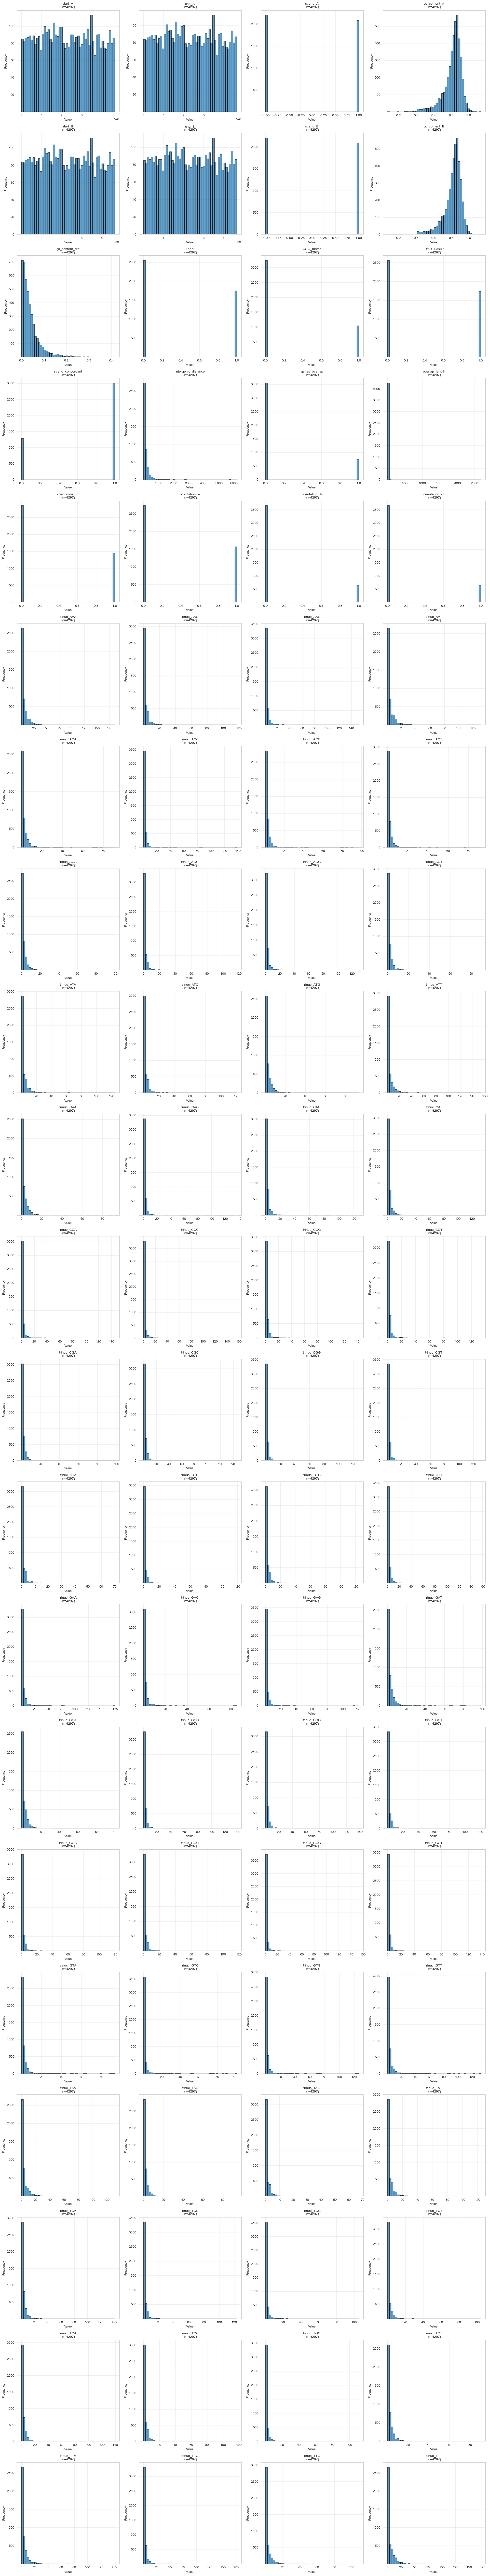


Summary Statistics for Numeric Columns:

start_A:
count            4297.0
mean     2298073.815918
std      1330617.675393
min               189.0
25%           1165142.0
50%           2274178.0
75%           3444542.0
max           4640717.0
Name: start_A, dtype: Float64

end_A:
count            4297.0
mean     2299005.184082
std       1330627.33122
min               255.0
25%           1165685.0
50%           2275273.0
75%           3444722.0
max           4640771.0
Name: end_A, dtype: Float64

strand_A:
count      4297.0
mean    -0.028159
std       0.99972
min          -1.0
25%          -1.0
50%          -1.0
75%           1.0
max           1.0
Name: strand_A, dtype: Float64

gc_content_A:
count    4297.000000
mean        0.508166
std         0.052419
min         0.136364
25%         0.489209
50%         0.520000
75%         0.540667
max         0.667175
Name: gc_content_A, dtype: float64

start_B:
count            4297.0
mean     2299153.814056
std      1330635.496138
min          

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numeric columns
numeric_cols = pairs_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Found {len(numeric_cols)} numeric columns")

# Set up the plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 15)

# Calculate grid dimensions
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

# Plot distributions for each numeric column
for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Plot histogram
    pairs_df[col].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}\n(n={pairs_df[col].notna().sum()})', fontsize=10)
    ax.set_xlabel('Value', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Numeric Columns:")
print("=" * 80)
for col in numeric_cols:
    print(f"\n{col}:")
    print(pairs_df[col].describe())


In [19]:
# Count rows where intergenic sequence length is less than 3
intergenic_seq_lengths = pairs_df['intergenic_seq'].str.len()
rows_with_short_seq = (intergenic_seq_lengths < 3).sum()

print(f"Number of rows where intergenic sequence length is less than 3: {rows_with_short_seq}")
print(f"Total number of rows: {len(pairs_df)}")
print(f"Percentage: {rows_with_short_seq / len(pairs_df) * 100:.2f}%")

# Group by Label for rows with short sequences
short_seq_df = pairs_df[intergenic_seq_lengths < 3]
grouped_by_label = short_seq_df.groupby('Label').size()
print("\nGroupby Label for rows with intergenic sequence length < 3:")
print(grouped_by_label)


Number of rows where intergenic sequence length is less than 3: 880
Total number of rows: 4297
Percentage: 20.48%

Groupby Label for rows with intergenic sequence length < 3:
Label
0    188
1    692
dtype: int64


In [20]:
pairs_df.columns

Index(['Entry_A', 'Sequence_A', 'refseq_A', 'locus_tag_A', 'start_A', 'end_A',
       'strand_A', 'gene_seq_A', 'gc_content_A', 'Entry_B', 'Sequence_B',
       'refseq_B', 'locus_tag_B', 'start_B', 'end_B', 'strand_B', 'gene_seq_B',
       'gc_content_B', 'gc_content_diff', 'Label', 'COG_category_A',
       'COG_category_B', 'COG_match', 'COG_similar', 'strand_concordant',
       'intergenic_distance', 'genes_overlap', 'overlap_length',
       'orientation_++', 'orientation_--', 'orientation_+-', 'orientation_-+',
       'intergenic_seq', 'trinuc_AAA', 'trinuc_AAC', 'trinuc_AAG',
       'trinuc_AAT', 'trinuc_ACA', 'trinuc_ACC', 'trinuc_ACG', 'trinuc_ACT',
       'trinuc_AGA', 'trinuc_AGC', 'trinuc_AGG', 'trinuc_AGT', 'trinuc_ATA',
       'trinuc_ATC', 'trinuc_ATG', 'trinuc_ATT', 'trinuc_CAA', 'trinuc_CAC',
       'trinuc_CAG', 'trinuc_CAT', 'trinuc_CCA', 'trinuc_CCC', 'trinuc_CCG',
       'trinuc_CCT', 'trinuc_CGA', 'trinuc_CGC', 'trinuc_CGG', 'trinuc_CGT',
       'trinuc_CTA', 'trinuc

In [21]:
# Save pairs_df to CSV
pairs_df.to_csv('data/ecoli_pairs.csv', index=False)


In [23]:
pairs_df.head()

,Entry_A,Sequence_A,refseq_A,locus_tag_A,start_A,end_A,strand_A,gene_seq_A,gc_content_A,Entry_B,...,trinuc_TCG,trinuc_TCT,trinuc_TGA,trinuc_TGC,trinuc_TGG,trinuc_TGT,trinuc_TTA,trinuc_TTC,trinuc_TTG,trinuc_TTT
0,U00096.3_prot_AAC73112.1_1,MKRISTTITTTITITTGNGAG,AAC73112.1,b0001,189,255,1,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,0.515152,U00096.3_prot_AAC73113.1_2,...,1,0,1,1,0,0,0,1,0,7
1,U00096.3_prot_AAC73113.1_2,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,AAC73113.1,b0002,336,2799,1,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,0.530654,U00096.3_prot_AAC73114.1_3,...,0,0,0,0,0,0,0,0,0,0
2,U00096.3_prot_AAC73114.1_3,MVKVYAPASSANMSVGFDVLGAAVTPVDGALLGDVVTVEAAETFSL...,AAC73114.1,b0003,2800,3733,1,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,0.562701,U00096.3_prot_AAC73115.1_4,...,0,0,0,0,0,0,0,0,0,0
3,U00096.3_prot_AAC73115.1_4,MKLYNLKDHNEQVSFAQAVTQGLGKNQGLFFPHDLPEFSLTEIDEM...,AAC73115.1,b0004,3733,5020,1,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,0.528361,U00096.3_prot_AAC73116.1_5,...,2,5,3,4,1,0,6,3,2,7
4,U00096.3_prot_AAC73116.1_5,MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYW...,AAC73116.1,b0005,5233,5530,1,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,0.538721,U00096.3_prot_AAC73117.1_6,...,0,3,4,6,1,1,2,3,3,2
